In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
# Load the data
prices = pd.read_csv('europe indices monthly.csv', index_col='Date', parse_dates=True)

# Calculate the returns and create a new DataFrame
returns = prices.pct_change().dropna()

# Set the weights
weights = np.full(len(prices.columns), 1/len(prices.columns))

# Set the initial investment and monthly investment
initial_investment = 100
monthly_investment = 100
target_investment=14400
# Initialize the portfolio value with the initial investment
portfolio_value = [initial_investment]



# Iterate over the months and calculate the portfolio value
for i in range(len(prices) - 1):
    # Rebalance the portfolio every month
    if (i + 1) % 12 == 0:
        weights = np.full(len(prices.columns), 1/len(prices.columns))
    # Calculate the returns for the current month
    returns_current_month = returns.iloc[i]
    # Calculate the portfolio return for the current month
    portfolio_return = np.dot(weights, returns_current_month)
    # Calculate the portfolio value for the current month
    portfolio_value_month = portfolio_value[i] * (1 + portfolio_return)
    # Add the monthly investment to the portfolio value
    portfolio_value_month += monthly_investment
    # Add the portfolio value to the list of portfolio values
    portfolio_value.append(portfolio_value_month)

# Convert the list of portfolio values to a numpy array
portfolio_value = np.array(portfolio_value)

# Add the portfolio value as a new column in the prices DataFrame
prices['Portfolio Value'] = portfolio_value




# Calculate the total return, volatility, and Sharpe ratio
total_return = (prices['Portfolio Value'].iloc[-1] / target_investment - 1) 




cov_matrix = np.cov(returns.T)
portfolio_volatility = np.sqrt(weights.T @ cov_matrix @ weights) * np.sqrt(12) * 100
#sharpe_ratio = ((total_return) - 0.0363) / returns.std()
#sharpe_ratio = ((total_return) - 0.0363) / (portfolio_volatility) * 0.01
print("Total return: {:.2f}".format(total_return))
print("Volatility: {:.2f}".format(portfolio_volatility))
#print("Sharpe ratio: {:.2f}".format(sharpe_ratio.iloc[0]))
print(prices["Portfolio Value"])


Total return: 0.38
Volatility: 17.39
Date
2010-01-01      100.000000
2010-02-01      197.572729
2010-03-01      312.645568
2010-04-01      401.856689
2010-05-01      471.000636
                  ...     
2021-08-01    19014.093108
2021-09-01    18681.342087
2021-10-01    19535.320768
2021-11-01    18774.959910
2021-12-01    19936.588494
Name: Portfolio Value, Length: 144, dtype: float64


[-0.02427271  0.07629008 -0.03450834 -0.07678372 -0.01090573  0.07527204
 -0.04250585  0.04687774  0.04028851 -0.07308914  0.0521641   0.06460923
  0.01937087 -0.03066705  0.03831083 -0.03974095 -0.01086596 -0.06546896
 -0.13863483 -0.05057604  0.08507879 -0.03238545 -0.00669814  0.04488437
  0.03512441 -0.0171443  -0.07373234 -0.09297424  0.08552464  0.00680273
  0.0607974   0.01243747  0.01906296  0.02297123  0.02676619  0.03351121
 -0.0270992  -0.01374452  0.04769383  0.02299737 -0.06837105  0.06785121
 -0.01147096  0.06603774  0.06756504  0.00439256  0.00564896 -0.01249861
  0.04335752  0.01392299  0.01081998  0.01649055 -0.00839972 -0.03428384
  0.01058734  0.01117568 -0.03541989  0.03821002 -0.03443354  0.06477407
  0.07587755  0.03215705 -0.01579407 -0.0037507  -0.04191284  0.04639206
 -0.08390605 -0.0500345   0.09250264  0.02037807 -0.06545863 -0.08174215
 -0.03470404  0.02715726  0.01730344  0.00424719 -0.07578477  0.05033021
  0.01119451 -0.00743754  0.02632328 -0.00986574  0

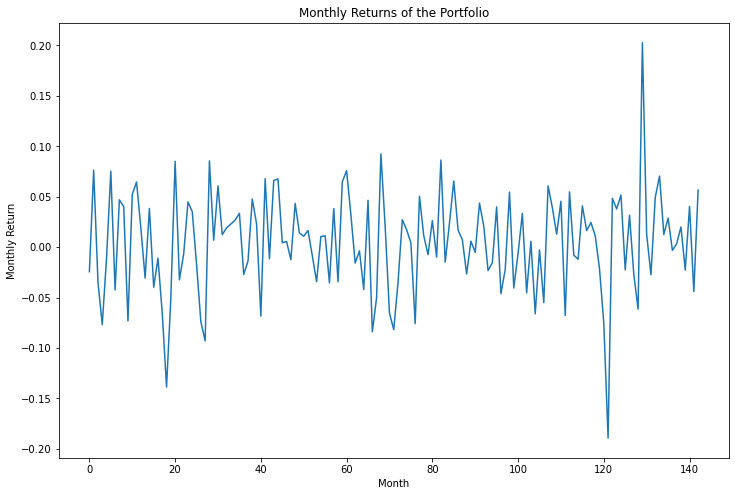

In [3]:
monthly_returns = ((portfolio_value[1:] - 100) / portfolio_value[:-1] )- 1
print(monthly_returns)
plt.figure(figsize=(12,8))
plt.plot(monthly_returns)
plt.xlabel('Month')
plt.ylabel('Monthly Return')
plt.title('Monthly Returns of the Portfolio')
plt.show()

In [4]:
import datetime as dt
import sys
import numpy as np
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn
import pandas as pd
from pandas_datareader import data as web
import seaborn as sns
from pylab import rcParams 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from arch import arch_model
from numpy.linalg import LinAlgError
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot, moment
from arch import arch_model
from arch.univariate import ConstantMean, GARCH, Normal
from sklearn.model_selection import TimeSeriesSplit
import warnings

In [5]:
%matplotlib inline
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
sns.set(style="darkgrid", color_codes=True)
rcParams['figure.figsize'] = 8,4

In [6]:
df = pd.DataFrame(monthly_returns, columns=['Returns'])

# Now 'df' is a DataFrame containing your array
print(df)

      Returns
0   -0.024273
1    0.076290
2   -0.034508
3   -0.076784
4   -0.010906
..        ...
138  0.020054
139 -0.022759
140  0.040360
141 -0.044041
142  0.056545

[143 rows x 1 columns]


In [8]:
# Specify GARCH model assumptions
basic_gm = arch_model(df['Returns'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
gm_result = basic_gm.fit()
print(gm_result.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8322818.460344783
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1180.7746979204921
Iteration:      3,   Func. Count:     22,   Neg. LLF: -218.30956075043707
Iteration:      4,   Func. Count:     29,   Neg. LLF: -116.70878561115073
Iteration:      5,   Func. Count:     35,   Neg. LLF: -228.88783441816105
Iteration:      6,   Func. Count:     41,   Neg. LLF: 2121.68104505666
Iteration:      7,   Func. Count:     47,   Neg. LLF: -231.78916137364777
Iteration:      8,   Func. Count:     52,   Neg. LLF: -212.4909200676942
Iteration:      9,   Func. Count:     59,   Neg. LLF: -231.82581443673422
Iteration:     10,   Func. Count:     64,   Neg. LLF: -231.82640405217174
Iteration:     11,   Func. Count:     69,   Neg. LLF: -231.8264245136462
Iteration:     12,   Func. Count:     74,   Neg. LLF: -231.82642600032688
Iteration:     13,   Func. Count:     78,   Neg. LLF: -231.82642600034535
Optimization terminated successfully    (Exit 

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
gm_vol = gm_result.conditional_volatility
def evaluate(observation, forecast): 
    # Call sklearn function to calculate MAE
    mae = mean_absolute_error(observation, forecast)
    print(f'Mean Absolute Error (MAE): {round(mae,3)}')
    # Call sklearn function to calculate MSE
    mse = mean_squared_error(observation, forecast)
    print(f'Mean Squared Error (MSE): {round(mse,3)}')
    return mae, mse

# Backtest model with MAE, MSE
evaluate(df['Returns'].sub(df['Returns'].mean()).pow(2), gm_vol**2)

Mean Absolute Error (MAE): 0.003
Mean Squared Error (MSE): 0.0


(0.0027319197770405202, 2.9653509206406982e-05)

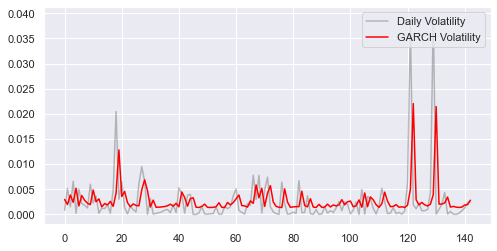

In [10]:
gm_vol = gm_result.conditional_volatility

# Plot the actual rets volatility
plt.plot(df['Returns'].sub(df['Returns'].mean()).pow(2), 
         color = 'grey', alpha = 0.52, label = 'Daily Volatility')

# Plot EGARCH  estimated volatility
plt.plot(gm_vol**2, color = 'red', label = 'GARCH Volatility')

plt.legend(loc = 'upper right')
plt.show()

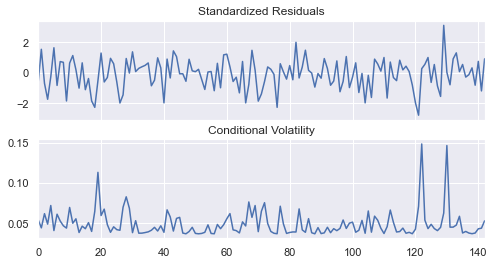

In [11]:
# Plot fitted results
gm_result.plot()
plt.show()

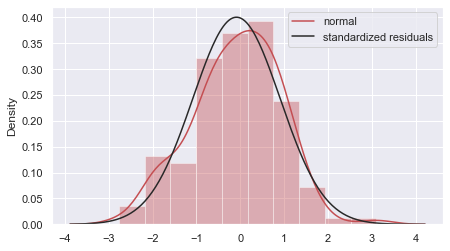

In [12]:
# Obtain model estimated residuals and volatility
gm_resid = gm_result.resid
gm_std = gm_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid /gm_std

# Plot the histogram of the standardized residuals
plt.figure(figsize=(7,4))
sns.distplot(gm_std_resid, norm_hist=True, fit=stats.norm, bins=10, color='r')
plt.legend(('normal', 'standardized residuals'))
plt.show()

In [14]:
# Specify GARCH model assumptions
skewt_gm = arch_model(df['Returns'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')

# Fit the model
skewt_result = skewt_gm.fit(disp = 'off')
print(skewt_result.summary())
# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility

                           Constant Mean - GARCH Model Results                           
Dep. Variable:                           Returns   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:                233.089
Distribution:      Standardized Skew Student's t   AIC:                          -454.178
Method:                       Maximum Likelihood   BIC:                          -436.401
                                                   No. Observations:                  143
Date:                           Fri, Sep 15 2023   Df Residuals:                      142
Time:                                   08:45:02   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
------------------------------------

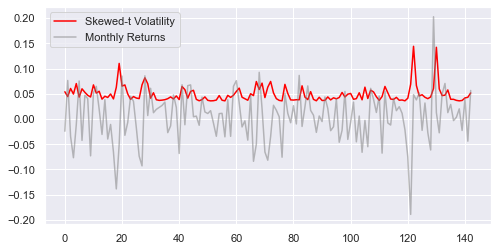

In [17]:
# Plot model fitting results
plt.plot(skewt_vol, color = 'red', label = 'Skewed-t Volatility')
plt.plot(df['Returns'], color = 'grey', 
         label = 'Monthly Returns', alpha = 0.52)
plt.legend(loc = 'upper left')
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def evaluate1(observation, forecast): 
    # Call sklearn function to calculate MAE
    mae21 = mean_absolute_error(observation, forecast)
    print(f'Mean Absolute Error (MAE): {round(mae21,3)}')
    # Call sklearn function to calculate MSE
    mse21 = mean_squared_error(observation, forecast)
    print(f'Mean Squared Error (MSE): {round(mse21,3)}')
    return mae21, mse21

# Backtest model with MAE, MSE
evaluate1(df['Returns'].sub(df['Returns'].mean()).pow(2), skewt_vol**2)

Mean Absolute Error (MAE): 0.003
Mean Squared Error (MSE): 0.0


(0.0026850285287830663, 2.908967592395874e-05)

In [20]:
 #Specify GJR-GARCH model assumptions
gjr_gm = arch_model(df['Returns'], p = 1, q = 1, o = 1, vol = 'EGARCH', dist = 't')

# Fit the model
gjrgm_result = gjr_gm.fit(disp = 'off')

# Print model fitting summary
print(gjrgm_result.summary())
gjrgm_vol = gjrgm_result.conditional_volatility


                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                      Returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:                242.479
Distribution:      Standardized Student's t   AIC:                          -472.957
Method:                  Maximum Likelihood   BIC:                          -455.180
                                              No. Observations:                  143
Date:                      Fri, Sep 15 2023   Df Residuals:                      142
Time:                              08:46:37   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def evaluate1(observation, forecast): 
    # Call sklearn function to calculate MAE
    mae11 = mean_absolute_error(observation, forecast)
    print(f'Mean Absolute Error (MAE): {round(mae11,3)}')
    # Call sklearn function to calculate MSE
    mse11 = mean_squared_error(observation, forecast)
    print(f'Mean Squared Error (MSE): {round(mse11,3)}')
    return mae11, mse11

# Backtest model with MAE, MSE
evaluate1(df['Returns'].sub(df['Returns'].mean()).pow(2), gjrgm_vol**2)

Mean Absolute Error (MAE): 0.002
Mean Squared Error (MSE): 0.0


(0.002441885984127595, 2.4103176757160974e-05)

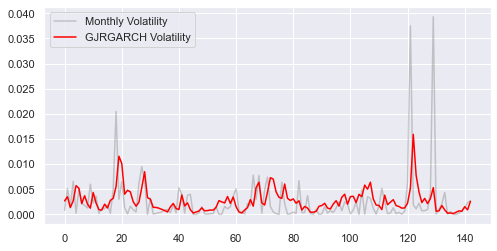

In [24]:
# Plot the actual Portfolio volatility
plt.plot(df['Returns'].sub(df['Returns'].mean()).pow(2), 
         color = 'grey', alpha = 0.4, label = 'Monthly Volatility')

# Plot EGARCH  estimated volatility
plt.plot(gjrgm_vol**2, color = 'red', label = 'GJRGARCH Volatility')

plt.legend(loc = 'upper left')
plt.show()

In [25]:
 #Specify GJR-GARCH model assumptions
egarch_gm = arch_model(df['Returns'], p = 1, q = 1, o = 1, vol = 'EGARCH', dist = 'ged')

# Fit the model
egarch_result = egarch_gm.fit(disp = 'off')

# Print model fitting summary
print(egarch_result.summary())
egarch_vol = egarch_result.conditional_volatility


                           Constant Mean - EGARCH Model Results                           
Dep. Variable:                            Returns   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 EGARCH   Log-Likelihood:                242.994
Distribution:      Generalized Error Distribution   AIC:                          -473.988
Method:                        Maximum Likelihood   BIC:                          -456.211
                                                    No. Observations:                  143
Date:                            Fri, Sep 15 2023   Df Residuals:                      142
Time:                                    08:49:25   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-------------------------

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def evaluate1(observation, forecast): 
    # Call sklearn function to calculate MAE
    mae31 = mean_absolute_error(observation, forecast)
    print(f'Mean Absolute Error (MAE): {round(mae31,3)}')
    # Call sklearn function to calculate MSE
    mse31 = mean_squared_error(observation, forecast)
    print(f'Mean Squared Error (MSE): {round(mse31,3)}')
    return mae31, mse31

# Backtest model with MAE, MSE
evaluate1(df['Returns'].sub(df['Returns'].mean()).pow(2), egarch_vol**2)

Mean Absolute Error (MAE): 0.002
Mean Squared Error (MSE): 0.0


(0.0024665322577757396, 2.4473013658340895e-05)

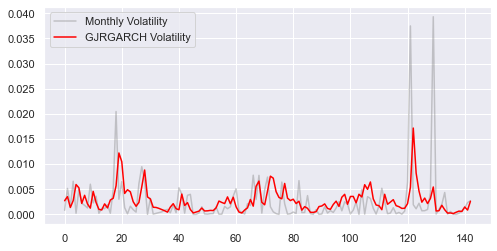

In [27]:
# Plot the actual Portfolio volatility
plt.plot(df['Returns'].sub(df['Returns'].mean()).pow(2), 
         color = 'grey', alpha = 0.4, label = 'Monthly Volatility')

# Plot EGARCH  estimated volatility
plt.plot(egarch_vol**2, color = 'red', label = 'GJRGARCH Volatility')

plt.legend(loc = 'upper left')
plt.show()

In [30]:
# Print each models BIC
print(f'GJR-GARCH BIC: {gjrgm_result.bic}')
print(f'ged EGARCH BIC: {egarch_result.bic}')
print(f'GARCH BIC: {gm_result.bic}')
print(f'GARCH-t BIC: {skewt_result.bic}')

GJR-GARCH BIC: -455.1803299073226
ged EGARCH BIC: -456.2106956079886
GARCH BIC: -443.8014734796141
GARCH-t BIC: -436.40115071972645


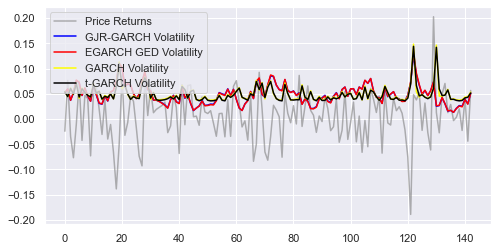

In [34]:


# Plot the actual portfolio returns
plt.plot(df['Returns'], color = 'grey', alpha = 0.6, label = 'Price Returns')

# Plot GJR-GARCH estimated volatility
plt.plot(gjrgm_vol, color = 'blue', label = 'GJR-GARCH Volatility')

# Plot EGARCH  estimated volatility
plt.plot(egarch_vol, color = 'red', label = 'EGARCH GED Volatility')

# Plot EGARCH  estimated volatility
plt.plot(gm_vol, color = 'yellow', label = 'GARCH Volatility')
# Plot EGARCH  estimated volatility
plt.plot(skewt_vol, color = 'black', label = 't-GARCH Volatility')


plt.legend(loc = 'upper left')
plt.show()

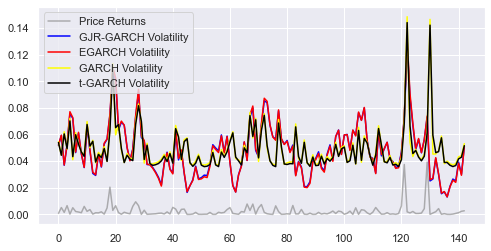

In [35]:
plt.plot(df['Returns'].sub(df['Returns'].mean()).pow(2), color = 'grey', alpha = 0.6, label = 'Price Returns')

# Plot GJR-GARCH estimated volatility
plt.plot(gjrgm_vol, color = 'blue', label = 'GJR-GARCH Volatility')

# Plot EGARCH  estimated volatility
plt.plot(egarch_vol, color = 'red', label = 'EGARCH Volatility')

# Plot EGARCH  estimated volatility
plt.plot(gm_vol, color = 'yellow', label = 'GARCH Volatility')
# Plot EGARCH  estimated volatility
plt.plot(skewt_vol, color = 'black', label = 't-GARCH Volatility')


plt.legend(loc = 'upper left')
plt.show()

      Returns
114 -0.012032
115  0.040875
116  0.016434
117  0.024393
118  0.011246
119 -0.021432
120 -0.075571
121 -0.189195
122  0.048303
123  0.037863
124  0.051549
125 -0.022544
126  0.031643
127 -0.027044
128 -0.061477
129  0.202644
130  0.012547
131 -0.027433
132  0.049311
133  0.070434
134  0.012561
135  0.028798
136 -0.003171
137  0.003407
138  0.020054
139 -0.022759
140  0.040360
141 -0.044041
142  0.056545
Iteration:      1,   Func. Count:      6,   Neg. LLF: 8322818.460344783
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1180.7746979204921
Iteration:      3,   Func. Count:     22,   Neg. LLF: -218.30956075043707
Iteration:      4,   Func. Count:     29,   Neg. LLF: -116.70878561115073
Iteration:      5,   Func. Count:     35,   Neg. LLF: -228.88783441816105
Iteration:      6,   Func. Count:     41,   Neg. LLF: 2121.68104505666
Iteration:      7,   Func. Count:     47,   Neg. LLF: -231.78916137364777
Iteration:      8,   Func. Count:     52,   Neg. LLF: -212.490920067

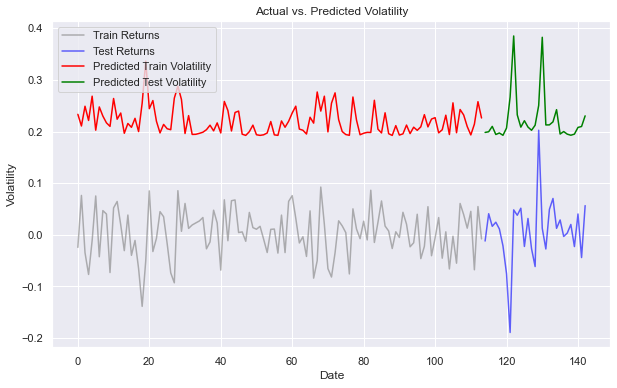

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets (80-20 split)
train_size = int(0.8 * len(df))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]
print(test_data)
# Fit the GARCH model on the training data
egarch_result = basic_gm.fit()

# Predict volatility on both training and testing data
train_volatility = np.sqrt(egarch_result.conditional_volatility.iloc[:train_size])
test_volatility = np.sqrt(egarch_result.conditional_volatility.iloc[train_size:])

# Plot actual vs. predicted volatility
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Returns'], color='grey', label='Train Returns', alpha=0.6)
plt.plot(test_data.index, test_data['Returns'], color='blue', label='Test Returns', alpha=0.6)
plt.plot(train_volatility.index, train_volatility, color='red', label='Predicted Train Volatility')
plt.plot(test_volatility.index, test_volatility, color='green', label='Predicted Test Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(loc='upper left')
plt.title('Actual vs. Predicted Volatility')
plt.show()


In [40]:
 #Set the forecast start index t
forecast_start_index = 114

# Forecast
forecasts = res.forecast(start=forecast_start_index)

# Get conditional mean and variance from index 114 onwards
cond_mean = forecasts.mean.iloc[forecast_start_index:]
cond_var = forecasts.variance.iloc[forecast_start_index:]

# Calculate quantiles
q1 = am.distribution.ppf([0.01, 0.05], res.params[5])
print(q1)


[-2.07139522 -1.61081118]


In [41]:
value_at_risk = -cond_mean.values - np.sqrt(cond_var).values * q1[None, :]
value_at_risk = pd.DataFrame(value_at_risk, columns=['1%', '5%'], index=cond_var.index)
value_at_risk.describe()


,1%,5%
count,29.000000,29.000000
mean,0.090567,0.070750
std,0.037656,0.029283
min,0.047136,0.036976
25%,0.067520,0.052828
50%,0.079556,0.062187
75%,0.107351,0.083802
max,0.217487,0.169448


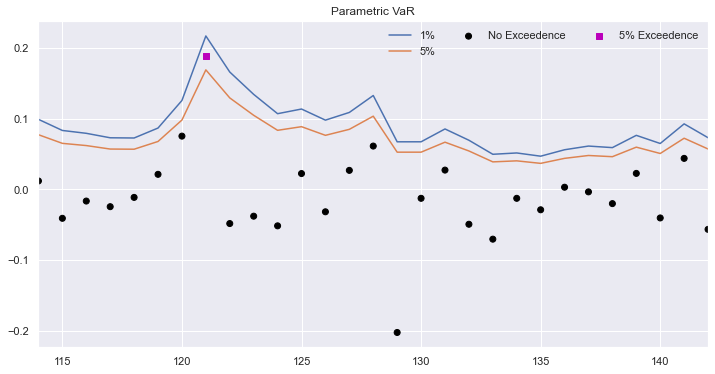

In [49]:
ax = value_at_risk.plot(legend=False, figsize=(12,6))
xl = ax.set_xlim(value_at_risk.index[0], value_at_risk.index[-1])


start_index = 114
rets_2020 = df['Returns'].iloc[start_index:]
rets_2020.name = 'Portfolio Return'
c = []
for idx in value_at_risk.index:
    if rets_2020[idx] > -value_at_risk.loc[idx, '5%']:
        c.append('#000000')
    elif rets_2020[idx] < -value_at_risk.loc[idx, '1%']:
        c.append('#BB0000')
    else:
        c.append('#BB00BB')
        
c = np.array(c, dtype='object')

labels = {
    
    '#BB0000': '1% Exceedence',
    '#BB00BB': '5% Exceedence',
    '#000000': 'No Exceedence'
}

markers = {'#BB0000': 'x', '#BB00BB': 's', '#000000': 'o'}

for color in np.unique(c):
    sel = c == color
    ax.scatter(
        rets_2020.index[sel],
        -rets_2020.loc[sel],
        marker=markers[color],
        c=c[sel],
        label=labels[color])
    
ax.set_title('Parametric VaR')
ax.legend(frameon=False, ncol=3)

plt.show()


In [44]:
# Obtain model estimated residuals and volatility
gm_resid = res.resid
gm_std = res.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid /gm_std

# Obtain the empirical quantiles
q22 = gm_std_resid.quantile([.01, .05])
print(q22)

0.01   -2.157046
0.05   -1.538197
dtype: float64


In [53]:
value_at_risk11 = -cond_mean.values - np.sqrt(cond_var).values * q22.values[None, :]
value_at_risk11 = pd.DataFrame(value_at_risk11, columns=['1%', '5%'], index=cond_var.index)
value_at_risk11.describe()

,1%,5%
count,29.000000,29.000000
mean,0.094252,0.067625
std,0.039213,0.027963
min,0.049025,0.035374
25%,0.070252,0.050511
50%,0.082786,0.059449
75%,0.111731,0.080089
max,0.226420,0.161875


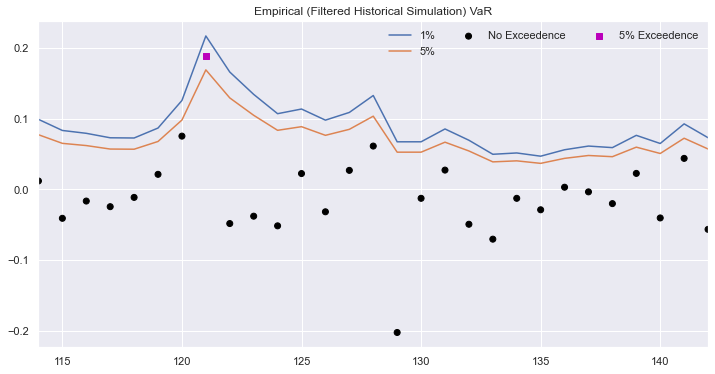

In [54]:
ax = value_at_risk.plot(legend=False, figsize=(12,6))
xl = ax.set_xlim(value_at_risk.index[0], value_at_risk.index[-1])


start_index = 114
rets_2020 = df['Returns'].iloc[start_index:]
rets_2020.name = 'Portfolio Return'
c = []

c = []
for idx in value_at_risk.index:
    if rets_2020[idx] > -value_at_risk11.loc[idx, '5%']:
        c.append('#000000')
    elif rets_2020[idx] < -value_at_risk11.loc[idx, '1%']:
        c.append('#BB0000')
    else:
        c.append('#BB00BB')
        
c = np.array(c, dtype='object')

labels = {
    
    '#BB0000': '1% Exceedence',
    '#BB00BB': '5% Exceedence',
    '#000000': 'No Exceedence'
}

markers = {'#BB0000': 'x', '#BB00BB': 's', '#000000': 'o'}

for color in np.unique(c):
    sel = c == color
    ax.scatter(
        rets_2020.index[sel],
        -rets_2020.loc[sel],
        marker=markers[color],
        c=c[sel],
        label=labels[color])
    
ax.set_title('Empirical (Filtered Historical Simulation) VaR')
ax.legend(frameon=False, ncol=3)

plt.show()
